In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import mayavi
from itertools import product
from random import shuffle
from copy import deepcopy

In [2]:
num_users = 1000 # number of users
num_campaigns = 100 # number of campaigns with different options that all samples are equally distributed among
samples_per_campaign = 100000 # number of samples per campaign
num_actions = 10 # number of actions per campaign

num_samples = num_campaigns * samples_per_campaign # total number of samples

# Determine number of times that each user is seen

# Step 1: draw relative frequencies for seeing different users from a uniform distribution
user_nums = np.asarray([np.random.random() for i in range(num_users)])

# Step 2: normalize frequencies to get probabilities, multiply by total number of samples,
#   and convert to integers to get total numbers of times that each user is seen;
#   total number of samples will be < num_samples due to rounding down
user_nums = (num_samples*user_nums/user_nums.sum()).astype(int)

# Step 3: for any users who are never seen, add 1 time
i = 0
j = user_nums.argsort()[0]
while user_nums[j] == 0:
    user_nums[j] += 1
    i += 1
    j = user_nums.argsort()[i]

# Step 4: add 1 to users who are seen the most times to get the total number of samples = num_samples
to_add = num_samples - user_nums.sum()
for i in range(to_add):
    j = user_nums.argsort()[num_users-i-1]
    user_nums[j] += 1

# Get correct total number of samples with correct numbers of samples for each user in random order
user_id = []
for user in range(num_users):
    for num in range(user_nums[user]):
        user_id.append(user+1)
shuffle(user_id)

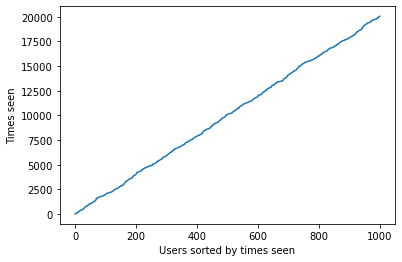

In [36]:
sorted_user_nums = deepcopy(user_nums)
sorted_user_nums.sort()
plt.xlabel("Users sorted by times seen")
plt.ylabel("Times seen")
plt.plot(sorted_user_nums)
plt.show()

In [4]:
# For every user and each of the two user features, randomly pick the mean from a uniform distribution
# over the interval (-0.5, 0.5) and the standard deviation from a uniform distribution over the interval (0, std)

user_std1 = 0.2 # maximum standard deviation for user feature 1
user_std2 = 0.3 # maximum standard deviation for user feature 2
user_meanh = 0.2 # maximum absolute value of the mean for hidden user feature
user_stdh = 0.1 # maximum standard deviation for hidden user feature

user_feat1_means = {}
user_feat1_stds = {}
user_feat2_means = {}
user_feat2_stds = {}
user_hidden_means = {}
user_hidden_stds = {}

for n in range(num_users):
    user_feat1_means[n+1] = np.random.random() - 0.5
    user_feat1_stds[n+1] = user_std1 * np.random.random()
    user_feat2_means[n+1] = np.random.random() - 0.5
    user_feat2_stds[n+1] = user_std2 * np.random.random()
    user_hidden_means[n+1] = 2 * user_meanh * (np.random.random() - 0.5)
    user_hidden_stds[n+1] = user_stdh * np.random.random()

# For every campaign and each of the two campaign features, randomly pick the mean from a uniform distribution
# over the interval (-0.5, 0.5) and the standard deviation from a uniform distribution over the interval (0, std)

campaign_std1 = 0.1 # maximum standard deviation for campaign feature 1
campaign_std2 = 0.05 # maximum standard deviation for campaign feature 2
campaign_meanh = 0.15 # maximum absolute value of the mean for hidden campaign feature
campaign_stdh = 0.05 # maximum standard deviation for hidden campaign feature

campaign_feat1_means = {}
campaign_feat1_stds = {}
campaign_feat2_means = {}
campaign_feat2_stds = {}
campaign_hidden_means = {}
campaign_hidden_stds = {}

for n in range(num_campaigns):
    campaign_feat1_means[n+1] = np.random.random() - 0.5
    campaign_feat1_stds[n+1] = campaign_std1 * np.random.random()
    campaign_feat2_means[n+1] = np.random.random() - 0.5
    campaign_feat2_stds[n+1] = campaign_std2 * np.random.random()
    campaign_hidden_means[n+1] = 2 * campaign_meanh * (np.random.random() - 0.5)
    campaign_hidden_stds[n+1] = campaign_stdh * np.random.random()

In [5]:
campaign_id = []
user_feat1 = []
user_feat2 = []
user_hidden = []
campaign_feat1 = []
campaign_feat2 = []
campaign_hidden = []
reward = []
optimal = []

for n in range(num_samples):
    if (n+1) % 1000000 == 0:
        print (n+1)
    
# assign user id for each sample so that each user appears the correct number of times
    j = user_id[n]
    # sample the values for the user features from normal distributions with pre-defined means and stds
    user_feat1.append(np.random.normal(user_feat1_means[j], user_feat1_stds[j]))
    user_feat2.append(np.random.normal(user_feat2_means[j], user_feat2_stds[j]))
    user_hidden.append(np.random.normal(user_hidden_means[j], user_hidden_stds[j]))
    k = n // samples_per_campaign + 1 # assign a campaign id (based on the sample number)
    campaign_id.append(k)
    campaign_feat1.append(np.random.normal(campaign_feat1_means[k], campaign_feat1_stds[k]))
    campaign_feat2.append(np.random.normal(campaign_feat2_means[k], campaign_feat2_stds[k]))
    campaign_hidden.append(np.random.normal(campaign_hidden_means[k], campaign_hidden_stds[k]))
    # set up 3D user and campaign vectors: (feature 1, feature 2, hidden feature)        
    user_vec = np.asarray([user_feat1[-1], user_feat2[-1], user_hidden[-1]])
    campaign_vec = np.asarray([campaign_feat1[-1], campaign_feat2[-1], campaign_hidden[-1]])
    # find angle between user and campaign vectors
    cosphi = np.dot(user_vec, campaign_vec.T) / (np.linalg.norm(user_vec) * np.linalg.norm(campaign_vec))
    # define reward as the arccos of this angle, shifted and scaled to be between -0.5 and +0.5
    reward.append(np.arccos(cosphi)/np.pi - 0.5)
    # select optimal action based on reward value:
    #   -0.5 < reward < -0.4 --> action 1, -0.4 < reward < -0.3 --> action 2, etc.
    action = 1
    while reward[-1] > -0.5 + action/num_actions:
        action += 1
    optimal.append(action)

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000


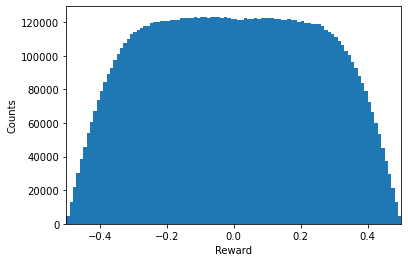

In [34]:
bins = [i*0.01 - 0.5 for i in range(101)]
plt.xlim(-0.5, 0.5)
plt.xlabel("Reward")
plt.ylabel("Counts")
plt.hist(reward, bins=bins)
plt.show()

In [7]:
# Bin user features
bins = [round(i/100 - 1, 2) for i in range(201)] # with a step of 0.01
grid_pts = list(product(bins, bins))
grid = {}
for pt in grid_pts:
    grid[pt] = 0

for n in range(num_samples):
    if (n + 1) % 1000000 == 0:
        print (n + 1)
    pt = [round(np.ceil(user_feat1[n]*100)/100, 2), round(np.ceil(user_feat2[n]*100)/100, 2)]
    # if user features are < -1 or > 1, bin them with -1 or 1 (a few outliers, not visible in graph)
    if pt[0] < -1:
        pt[0] = -1
    if pt[1] < -1:
        pt[1] = -1
    if pt[0] > 1:
        pt[0] = 1
    if pt[1] > 1: 
        pt[1] = 1
    pt = tuple(pt)
    grid[pt] += 1

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000


Number of samples with each combination of user features


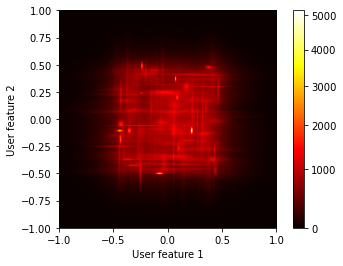

In [20]:
# Plot distribution of user features
matr_user = np.zeros((201, 201))
for i in range(201):
    for j in range(201):
        matr_user[i][j] = grid[(bins[i], bins[j])]

print('Number of samples with each combination of user features')
plt.imshow(matr_user, cmap = 'hot', norm=colors.PowerNorm(gamma=0.8), extent=[-1,1,-1,1])
plt.colorbar()
plt.xlabel('User feature 1')
plt.ylabel('User feature 2')
plt.show()

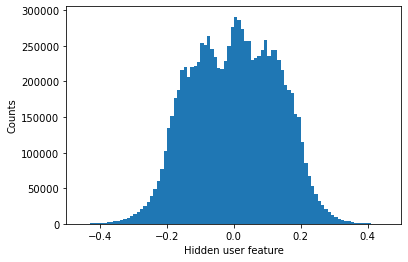

In [35]:
# Plot histogram for hidden user feature
plt.xlim(-0.5, 0.5)
plt.xlabel("Hidden user feature")
plt.ylabel("Counts")
plt.hist(user_hidden, bins=bins)
plt.show()

In [10]:
# Bin campaign features
bins = [round(i/100 - 1, 2) for i in range(201)]
grid_pts = list(product(bins, bins))
grid_campaign = {}
for pt in grid_pts:
    grid_campaign[pt] = 0

for n in range(num_samples):
    if (n + 1) % 1000000 == 0:
        print (n + 1)
    pt = [round(np.ceil(campaign_feat1[n]*100)/100, 2), round(np.ceil(campaign_feat2[n]*100)/100, 2)]
    # if campaign features are < -1 or > 1, bin them with -1 or 1 (a few outliers, not visible in graph)
    if pt[0] < -1:
        pt[0] = -1
    if pt[1] < -1:
        pt[1] = -1
    if pt[0] > 1:
        pt[0] = 1
    if pt[1] > 1: 
        pt[1] = 1
    pt = tuple(pt)
    grid_campaign[pt] += 1

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000


Number of samples with each combination of campaign features


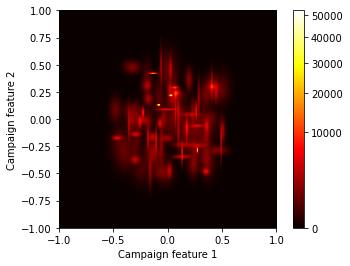

In [22]:
# Plot campaign features
matr_campaign = np.zeros((201, 201))
for i in range(201):
    for j in range(201):
        matr_campaign[i][j] = grid_campaign[(bins[i], bins[j])]

print('Number of samples with each combination of campaign features')
plt.imshow(matr_campaign, cmap = 'hot', norm=colors.PowerNorm(gamma=0.5), extent=[-1,1,-1,1])
plt.colorbar()
plt.xlabel('Campaign feature 1')
plt.ylabel('Campaign feature 2')
plt.show()

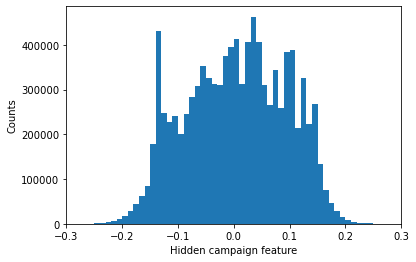

In [38]:
# Plot histogram for hidden campaign feature
plt.xlim(-0.3, 0.3)
plt.xlabel("Hidden campaign feature")
plt.ylabel("Counts")
plt.hist(campaign_hidden, bins=bins)
plt.show()

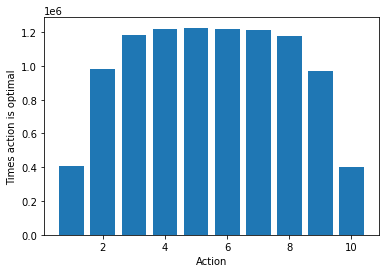

In [42]:
# print numbers of samples for all optimal actions
opts = np.zeros(10).astype(int)
for n in range(num_samples):
    opts[optimal[n]-1] += 1

a = [i+1 for i in range(num_actions)]
s = [opts[i] for i in range(num_actions)]
#print ("{:>12s}{:>12s}".format("Action", "# Samples"))
#for n in range(num_actions):
#    print ("{:12d}{:12d}".format(n+1, opts[n]))

plt.xlabel("Action")
plt.ylabel("Times action is optimal")
plt.bar(a, s)
plt.show()

In [26]:
# write all features to dataframe
df = pd.DataFrame()
df['user_id'] = user_id
df['user_feature_1'] = user_feat1
df['user_feature_2'] = user_feat2
df['user_feature_hidden'] = user_hidden
df['campaign_id'] = campaign_id
df['campaign_feature_1'] = campaign_feat1
df['campaign_feature_2'] = campaign_feat2
df['campaign_feature_hidden'] = campaign_hidden
df['reward'] = reward
df['optimal_action'] = optimal
df.head()

,user_id,user_feature_1,user_feature_2,user_feature_hidden,campaign_id,campaign_feature_1,campaign_feature_2,campaign_feature_hidden,reward,optimal_action
0,897,-0.274970,0.202852,-0.103931,1,-0.231624,0.462141,0.148505,-0.264811,3
1,35,0.489462,-0.040341,0.066766,1,-0.317610,0.440337,0.149169,0.198915,7
2,689,-0.458089,0.120899,0.060884,1,-0.234123,0.429651,0.146294,-0.241988,3
3,350,-0.390775,0.041562,-0.096576,1,-0.233778,0.420403,0.149173,-0.153331,4
4,854,-0.000106,0.425490,0.181184,1,-0.205593,0.453234,0.149373,-0.367993,2


In [27]:
# write dataframe to file
df.to_csv('/home/aleksey/Downloads/generated4.csv', index=False)

In [29]:
# Find the mean and standard deviation of the numbers of optimal actions over users
all_actions = []
for user in range(num_users):
    df_subset = df.loc[df['user_id'] == user+1]
    actions = df_subset.groupby('optimal_action').count()['user_id']
    if len(actions) != num_actions:
        actions2 = []
        keys = list(actions.keys())
        for action in range(num_actions):
            if action in keys:
                actions2.append(actions[action])
            else:
                actions2.append(0)
        actions = np.asarray(actions2)
    else:
        actions = actions.to_numpy()
    all_actions.append(100*actions/actions.sum())
all_actions = np.stack(all_actions, axis=0)
print ("Distribution of optimal actions among users")
print ("{:>12s}{:>18s}{:>18s}".format("Action", "Mean (% total)", "Stdev (% total)"))
means = all_actions.mean(axis=0)
stdevs = all_actions.std(axis=0)
for n in range(means.shape[0]):
    print("{:>12d}{:>18.4f}{:>18.4f}".format(n+1, means[n], stdevs[n]))

Distribution of optimal actions among users
      Action    Mean (% total)   Stdev (% total)
           1            4.0567            1.7278
           2            9.7429            2.3406
           3           11.8132            1.7940
           4           12.2696            1.9328
           5           12.2847            1.8799
           6           12.1714            1.8959
           7           12.1474            1.9056
           8           11.7570            1.7500
           9            9.7208            2.4561
          10            4.0361            1.8019


In [30]:
# Find the mean and standard deviation of the numbers of optimal actions over campaigns
all_actions = []
for campaign in range(num_campaigns):
    df_subset = df.loc[df['campaign_id'] == campaign+1]
    actions = df_subset.groupby('optimal_action').count()['campaign_id']
    if len(actions) != num_actions:
        actions2 = []
        keys = list(actions.keys())
        for action in range(num_actions):
            if action in keys:
                actions2.append(actions[action])
            else:
                actions2.append(0)
        actions = np.asarray(actions2)
    else:
        actions = actions.to_numpy()
    all_actions.append(100*actions/actions.sum())
all_actions = np.stack(all_actions, axis=0)
print ("Distribution of optimal actions among campaigns")
print ("{:>12s}{:>18s}{:>18s}".format("Action", "Mean (% total)", "Stdev (% total)"))
means = all_actions.mean(axis=0)
stdevs = all_actions.std(axis=0)
for n in range(means.shape[0]):
    print("{:>12d}{:>18.4f}{:>18.4f}".format(n+1, means[n], stdevs[n]))

Distribution of optimal actions among campaigns
      Action    Mean (% total)   Stdev (% total)
           1            4.0912            1.4276
           2            9.7894            1.8876
           3           11.8266            1.4253
           4           12.2005            1.4549
           5           12.2614            2.2261
           6           12.2014            2.1947
           7           12.1514            1.5408
           8           11.7604            1.5302
           9            9.6913            1.8123
          10            4.0265            1.3604


In [45]:
# Users seen maximum and minimum number of times
num_times_seen = []
for user in range(num_users):
    df_subset = df.loc[df['user_id'] == user+1]
    num_times_seen.append(df_subset.shape[0])
num_times_seen = np.asarray(num_times_seen)
print ("User seen maximum number of times:", num_times_seen.argmax(), ", seen", num_times_seen.max(), "times")
print ("User seen minimum number of times:", num_times_seen.argmin(), ", seen", num_times_seen.min(), "times")

User seen maximum number of times: 605 , seen 20044 times
User seen minimum number of times: 817 , seen 17 times
